<div style="display: flex; justify-content: space-between; align-items: flex-start;">
    <div style="text-align: left;">
        <p style="color:#FFD700; font-size: 15px; font-weight: bold; margin-bottom: 1px; text-align: left;">Published on  February 27, 2025</p>
        <h4 style="color:#4B0082; font-weight: bold; text-align: left; margin-top: 6px;">Author: Jocelyn C. Dumlao</h4>
        <p style="font-size: 17px; line-height: 1.7; color: #333; text-align: center; margin-top: 20px;"></p>
        <a href="https://www.linkedin.com/in/jocelyn-dumlao-168921a8/" target="_blank" style="display: inline-block; background-color: #003f88; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px;">LinkedIn</a>
        <a href="https://github.com/jcdumlao14" target="_blank" style="display: inline-block; background-color: transparent; color: #059c99; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px; border: 2px solid #007bff;">GitHub</a>
        <a href="https://www.youtube.com/@CogniCraftedMinds" target="_blank" style="display: inline-block; background-color: #ff0054; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px;">YouTube</a>
        <a href="https://www.kaggle.com/jocelyndumlao" target="_blank" style="display: inline-block; background-color: #3a86ff; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px;">Kaggle</a>
    </div>
</div>

# <p style="padding:10px;background-color:#f7e18a;margin:0;color:#102d02;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:15px 50px;overflow:hidden;font-weight:500;border: 3px solid #f2102e;">Philippines Population Projection: Univariate & Bivariate Analysis</p>

**File Description:** The file contains population projections for administrative level 3 regions ("admin3") in the Philippines ("phl") from mid-year 2020 to 2025. Admin3 might refer to municipalities or cities.

**Goal of Analysis:**

- Understand the population trends across different admin3 regions.

- Identify regions with significant growth or decline.

- Explore potential demographic patterns.

- Possibly forecast future population using machine learning techniques.

# <p style="padding:10px;background-color:#f7e18a;margin:0;color:#102d02;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:15px 50px;overflow:hidden;font-weight:500;border: 3px solid #f2102e;">Setting Up Environment</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional but useful for interactive work:
from IPython.display import display

#For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Configure plotting style
sns.set_style("whitegrid")  # or "darkgrid" for a different look

# Suppress warnings to keep the output cleaner
import warnings
warnings.filterwarnings('ignore')

# <p style="padding:10px;background-color:#f7e18a;margin:0;color:#102d02;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:15px 50px;overflow:hidden;font-weight:500;border: 3px solid #f2102e;">Data Loading and Initial Inspection</p>

In [2]:
file_path = "/kaggle/input/philippines-population-projection-2020-to-2025/phl_population-projections_admin3_midyear2020_2025.xlsx"

try:
    df = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}.  Please check the path.")
    exit()  # Or handle the error more gracefully

# Basic inspection
print("Shape of the data:", df.shape)
print("\nFirst 5 rows:")
display(df.head())  #Use display for better output in Jupyter
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print("\nSummary statistics:")
display(df.describe())

Shape of the data: (1634, 12)

First 5 rows:


,Region,Region_pcode,Province,Province_pcode,Municipality_City,Mun_Pcode,July2020,July2021,July2022,July2023,July2024,July2025
0,Region I (Ilocos Region),PH010000000,Ilocos Norte,PH012800000,Adams,PH012801000,1823,1827,1830,1833,1834,1835
1,Region I (Ilocos Region),PH010000000,Ilocos Norte,PH012800000,Bacarra,PH012802000,32778,32850,32908,32951,32979,32994
2,Region I (Ilocos Region),PH010000000,Ilocos Norte,PH012800000,Badoc,PH012803000,32218,32299,32365,32418,32456,32480
3,Region I (Ilocos Region),PH010000000,Ilocos Norte,PH012800000,Bangui,PH012804000,14954,14993,15024,15049,15067,15079
4,Region I (Ilocos Region),PH010000000,Ilocos Norte,PH012800000,City of Batac,PH012805000,56248,56389,56504,56595,56661,56702



Data types:
Region               object
Region_pcode         object
Province             object
Province_pcode       object
Municipality_City    object
Mun_Pcode            object
July2020              int64
July2021              int64
July2022              int64
July2023              int64
July2024              int64
July2025              int64
dtype: object

Missing values:
Region               0
Region_pcode         0
Province             0
Province_pcode       0
Municipality_City    0
Mun_Pcode            0
July2020             0
July2021             0
July2022             0
July2023             0
July2024             0
July2025             0
dtype: int64

Summary statistics:


,July2020,July2021,July2022,July2023,July2024,July2025
count,1.634000e+03,1.634000e+03,1.634000e+03,1.634000e+03,1.634000e+03,1.634000e+03
mean,6.656791e+04,6.744102e+04,6.828167e+04,6.908982e+04,6.986763e+04,7.061077e+04
std,1.401156e+05,1.419562e+05,1.437248e+05,1.454233e+05,1.470567e+05,1.486184e+05
min,1.930000e+02,1.940000e+02,1.950000e+02,1.960000e+02,1.960000e+02,1.960000e+02
25%,2.275775e+04,2.286050e+04,2.309700e+04,2.324975e+04,2.332225e+04,2.352050e+04
50%,3.625500e+04,3.671850e+04,3.696050e+04,3.739400e+04,3.770550e+04,3.800550e+04
75%,6.501125e+04,6.549650e+04,6.608950e+04,6.653050e+04,6.704175e+04,6.764600e+04
max,3.080813e+06,3.102433e+06,3.121477e+06,3.137962e+06,3.151858e+06,3.163105e+06


# <p style="padding:10px;background-color:#f7e18a;margin:0;color:#102d02;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:15px 50px;overflow:hidden;font-weight:500;border: 3px solid #f2102e;">Data Cleaning and Preprocessing</p>

In [3]:
# --- Column Renaming (Adapt Based on Actual Column Names) ---
df = df.rename(columns={
    "July2020": "Pop_2020",
    "July2021": "Pop_2021",
    "July2022": "Pop_2022",
    "July2023": "Pop_2023",
    "July2024": "Pop_2024",
    "July2025": "Pop_2025"
})

# --- Verify Renaming ---
print("Column names after renaming:", df.columns)

# --- Convert Population Columns to Numeric ---
pop_cols = ["Pop_2020", "Pop_2021", "Pop_2022", "Pop_2023", "Pop_2024", "Pop_2025"]
for col in pop_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --- Handle Missing Values (Example: Imputation with Median) ---
for col in pop_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# --- Feature Engineering (Example: Population Growth) ---
df['Growth_2020_2025'] = df['Pop_2025'] - df['Pop_2020']
df['Pct_Growth_2020_2025'] = (df['Growth_2020_2025'] / df['Pop_2020']) * 100

# --- Verify Changes ---
from IPython.display import display
display(df.head())
print(df.dtypes)
print(df.isnull().sum())


Column names after renaming: Index(['Region', 'Region_pcode', 'Province', 'Province_pcode',
       'Municipality_City', 'Mun_Pcode', 'Pop_2020', 'Pop_2021', 'Pop_2022',
       'Pop_2023', 'Pop_2024', 'Pop_2025'],
      dtype='object')


,Region,Region_pcode,Province,Province_pcode,Municipality_City,Mun_Pcode,Pop_2020,Pop_2021,Pop_2022,Pop_2023,Pop_2024,Pop_2025,Growth_2020_2025,Pct_Growth_2020_2025
0,Region I (Ilocos Region),PH010000000,Ilocos Norte,PH012800000,Adams,PH012801000,1823,1827,1830,1833,1834,1835,12,0.658256
1,Region I (Ilocos Region),PH010000000,Ilocos Norte,PH012800000,Bacarra,PH012802000,32778,32850,32908,32951,32979,32994,216,0.658979
2,Region I (Ilocos Region),PH010000000,Ilocos Norte,PH012800000,Badoc,PH012803000,32218,32299,32365,32418,32456,32480,262,0.813210
3,Region I (Ilocos Region),PH010000000,Ilocos Norte,PH012800000,Bangui,PH012804000,14954,14993,15024,15049,15067,15079,125,0.835897
4,Region I (Ilocos Region),PH010000000,Ilocos Norte,PH012800000,City of Batac,PH012805000,56248,56389,56504,56595,56661,56702,454,0.807140


Region                   object
Region_pcode             object
Province                 object
Province_pcode           object
Municipality_City        object
Mun_Pcode                object
Pop_2020                  int64
Pop_2021                  int64
Pop_2022                  int64
Pop_2023                  int64
Pop_2024                  int64
Pop_2025                  int64
Growth_2020_2025          int64
Pct_Growth_2020_2025    float64
dtype: object
Region                  0
Region_pcode            0
Province                0
Province_pcode          0
Municipality_City       0
Mun_Pcode               0
Pop_2020                0
Pop_2021                0
Pop_2022                0
Pop_2023                0
Pop_2024                0
Pop_2025                0
Growth_2020_2025        0
Pct_Growth_2020_2025    0
dtype: int64


# <p style="padding:10px;background-color:#f7e18a;margin:0;color:#102d02;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:15px 50px;overflow:hidden;font-weight:500;border: 3px solid #f2102e;">Exploratory Data Analysis (EDA)</p>

 - Univariate Analysis
 - Bivariate Analysis

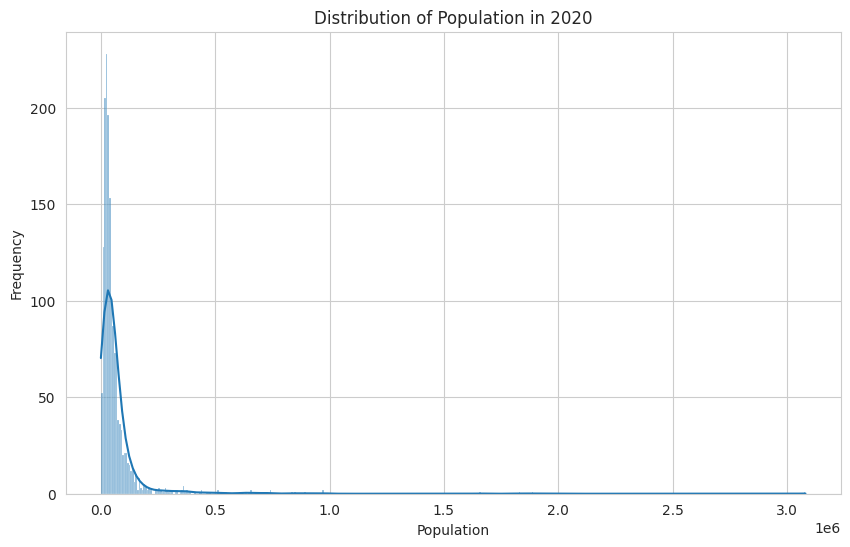

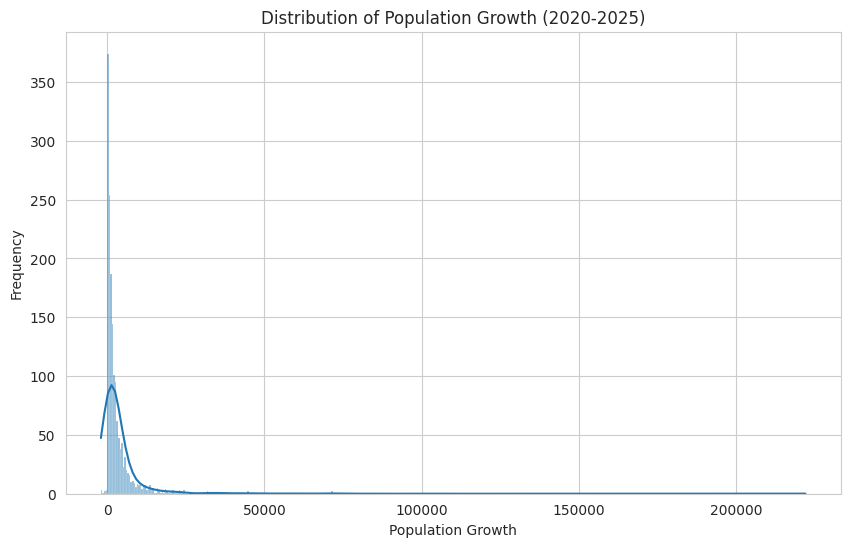

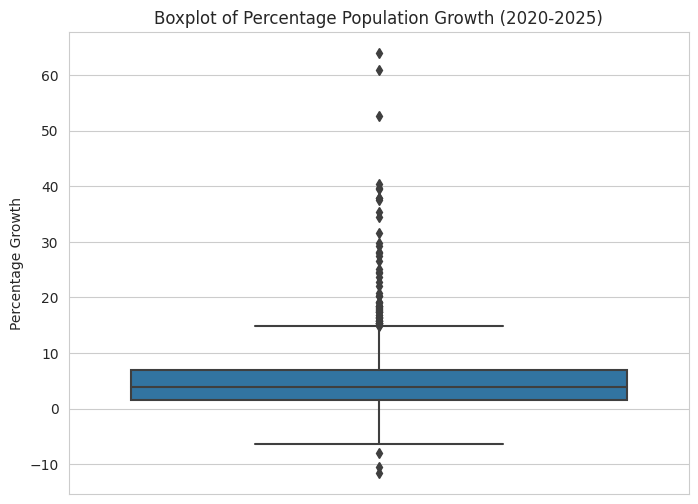

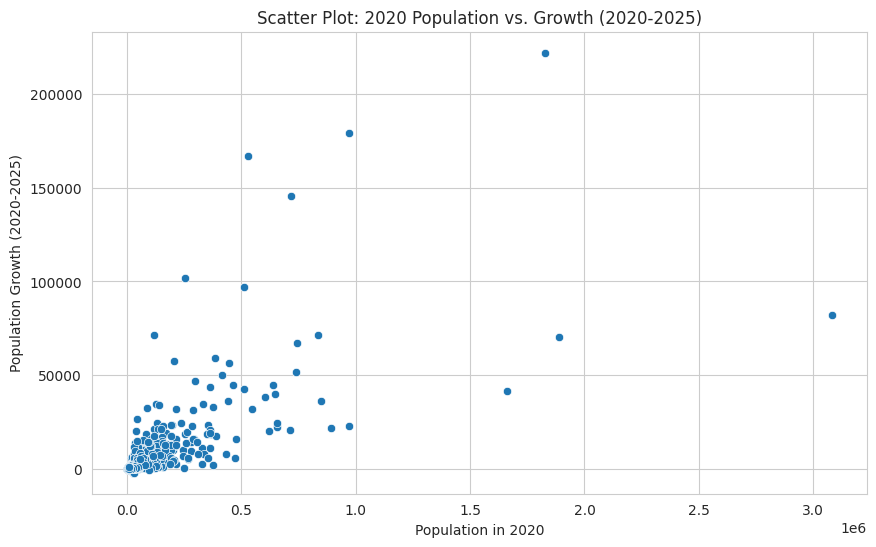

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Region I (Ilocos Region)'),
  Text(1, 0, 'Region II (Cagayan Valley)'),
  Text(2, 0, 'Region III (Central Luzon)'),
  Text(3, 0, 'Region IV-A (CALABARZON)'),
  Text(4, 0, 'Region V (Bicol Region)'),
  Text(5, 0, 'Region VI (Western Visayas)'),
  Text(6, 0, 'Region VII (Central Visayas)'),
  Text(7, 0, 'Region VIII (Eastern Visayas)'),
  Text(8, 0, 'Region IX (Zamboanga Peninsula)'),
  Text(9, 0, 'Region X (Northern Mindanao)'),
  Text(10, 0, 'Region XI (Davao Region)'),
  Text(11, 0, 'Region XII (SOCCSKSARGEN)'),
  Text(12, 0, 'National Capital Region (NCR)'),
  Text(13, 0, 'Cordillera Administrative Region (CAR)'),
  Text(14, 0, 'Autonomous Region in Muslim Mindanao (ARMM)'),
  Text(15, 0, 'Region XIII (Caraga)'),
  Text(16, 0, 'Region IV-B (MIMAROPA)')])

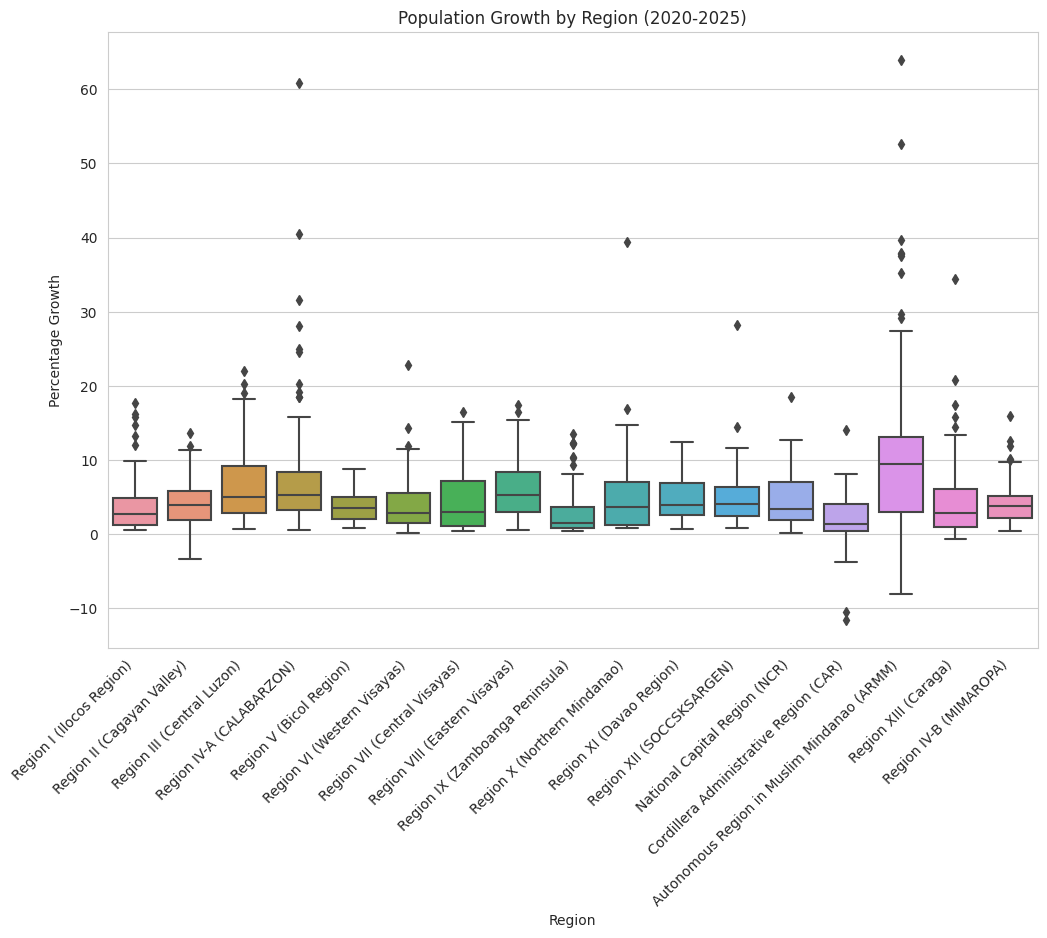

In [4]:
# --- Univariate Analysis (Analyzing each variable individually) ---

# Distribution of Population in 2020
plt.figure(figsize=(10, 6))
sns.histplot(df['Pop_2020'], kde=True)  # Histogram with kernel density estimate
plt.title('Distribution of Population in 2020')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

# Distribution of Population Growth
plt.figure(figsize=(10, 6))
sns.histplot(df['Growth_2020_2025'], kde=True)
plt.title('Distribution of Population Growth (2020-2025)')
plt.xlabel('Population Growth')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Percentage Growth
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Pct_Growth_2020_2025'])
plt.title('Boxplot of Percentage Population Growth (2020-2025)')
plt.ylabel('Percentage Growth')
plt.show()

# --- Bivariate Analysis (Analyzing relationships between two variables) ---

# Scatter Plot: 2020 Population vs. Growth
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pop_2020', y='Growth_2020_2025', data=df)
plt.title('Scatter Plot: 2020 Population vs. Growth (2020-2025)')
plt.xlabel('Population in 2020')
plt.ylabel('Population Growth (2020-2025)')
plt.show()

# Boxplots: Population growth by Region
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Pct_Growth_2020_2025', data=df)
plt.title('Population Growth by Region (2020-2025)')
plt.xlabel('Region')
plt.ylabel('Percentage Growth')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability

- Top/Bottom Growth: Identifying municipalities with the highest and lowest absolute growth.

- Regional Growth: Calculating average percentage growth by region.

- Time Series Exploration:

    - Melting the dataframe to create one row per region per year (easier to plot trends).

    - Calculating average population growth for each year.

    - Plotting population trends for a few randomly selected municipalities to visualize individual growth trajectories.


Top 10 Municipalities with Highest Population Growth:
               Municipality_City  Growth_2020_2025
1189                  DAVAO CITY            222028
1292                 Taguig City            179441
390                    Imus City            166941
249   City of San Jose Del Monte            145340
375                  Santo Tomas            102099
286                 ANGELES CITY             97080
1280                 Quezon City             82292
1279               City of Pasig             71336
478                        Baras             71195
1276              City of Manila             70550


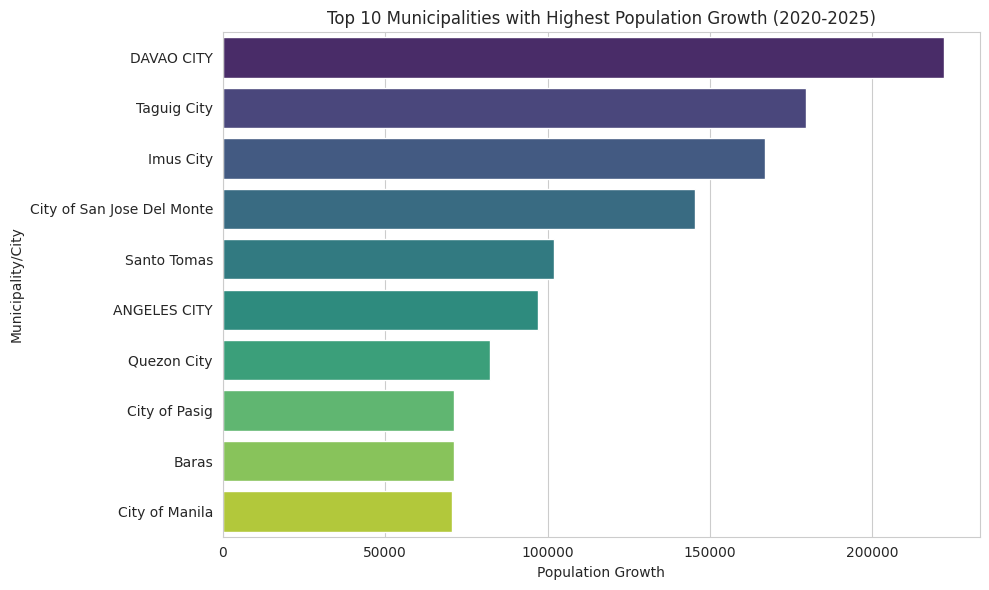


Top 10 Municipalities with Lowest Population Growth:
     Municipality_City  Growth_2020_2025
1485          Languyan             -2018
1426        Datu Piang             -1929
1482       South Ubian             -1557
1480           Simunul             -1078
1355             Besao              -668
1537    City of Bislig              -617
1353            Barlig              -497
1346          Lubuagan              -324
126            Itbayat               -94
1295             Bucay               -10

Regions with Highest Average % Growth:
Region
Autonomous Region in Muslim Mindanao (ARMM)    10.676365
Region IV-A (CALABARZON)                        7.320413
Region III (Central Luzon)                      6.356521
Region VIII (Eastern Visayas)                   5.841231
Region X (Northern Mindanao)                    5.139725
Region XII (SOCCSKSARGEN)                       5.127683
Region XI (Davao Region)                        4.988787
National Capital Region (NCR)                   4

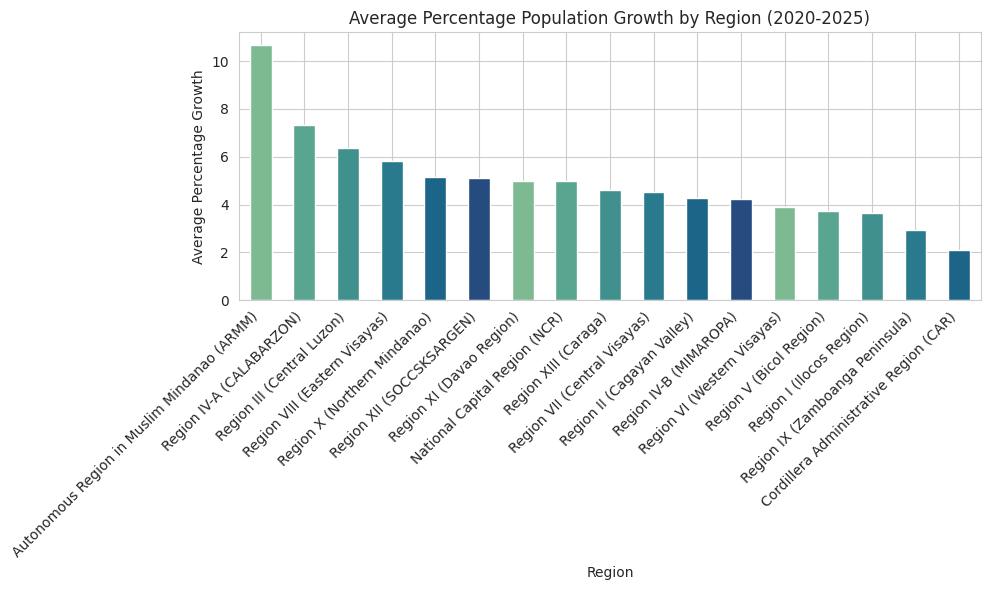

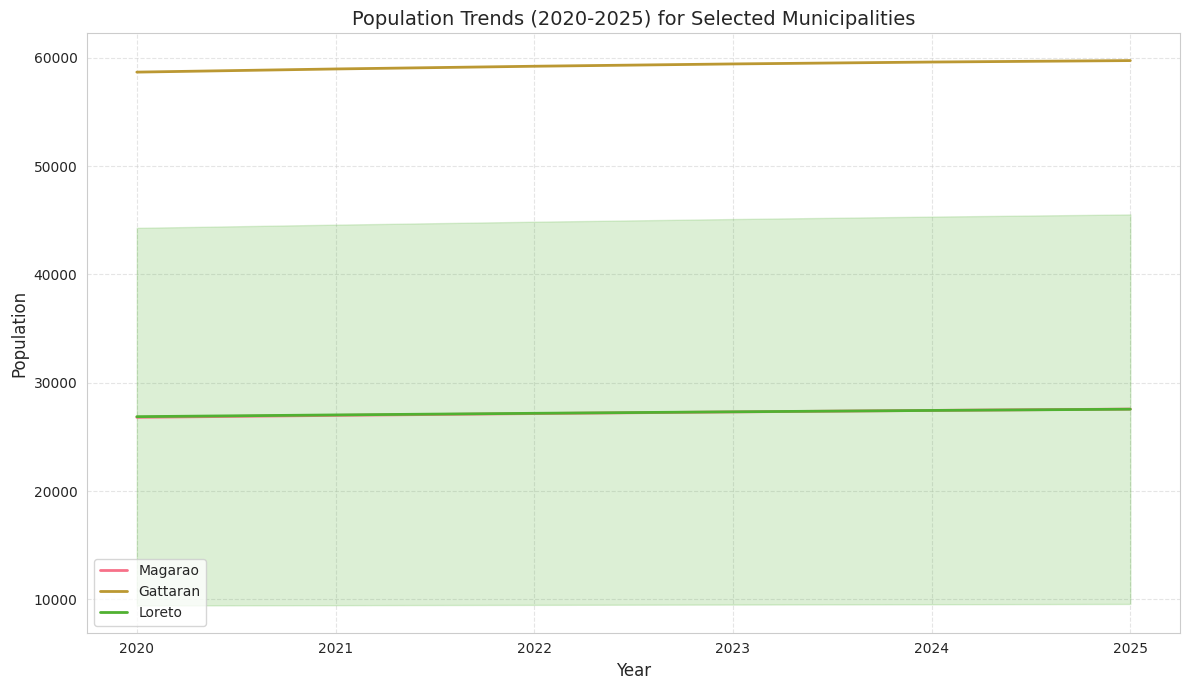


Average Population growth Over the years:
Year
2020    66567.907589
2021    67441.022032
2022    68281.667687
2023    69089.821297
2024    69867.634639
2025    70610.765606
Name: Population, dtype: float64


In [5]:
# Convert population columns to numeric, handle errors
pop_cols = ['Pop_2020', 'Pop_2021', 'Pop_2022', 'Pop_2023', 'Pop_2024', 'Pop_2025']
for col in pop_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(df[col].median())

# Feature Engineering
df['Growth_2020_2025'] = df['Pop_2025'] - df['Pop_2020']
df['Pct_Growth_2020_2025'] = (df['Growth_2020_2025'] / df['Pop_2020']) * 100

# --- Data Preparation for Time Series Analysis (Move this part to avoid redundancy) ---
df_melted = df.melt(id_vars=['Region', 'Province', 'Municipality_City'],
                     value_vars=pop_cols,
                     var_name='Year',
                     value_name='Population')

df_melted['Year'] = df_melted['Year'].str.replace('Pop_', '').astype(int)

# Top 10 Growing Municipalities - Horizontal Bar Chart
top_10_growth = df.sort_values('Growth_2020_2025', ascending=False).head(10)
print("\nTop 10 Municipalities with Highest Population Growth:")
print(top_10_growth[['Municipality_City', 'Growth_2020_2025']])

plt.figure(figsize=(10, 6))
sns.barplot(x='Growth_2020_2025', y='Municipality_City', data=top_10_growth, palette='viridis')
plt.title('Top 10 Municipalities with Highest Population Growth (2020-2025)')
plt.xlabel('Population Growth')
plt.ylabel('Municipality/City')
plt.tight_layout()
plt.show()

# Bottom 10 Growing Municipalities
bottom_10_growth = df.sort_values('Growth_2020_2025', ascending=True).head(10)
print("\nTop 10 Municipalities with Lowest Population Growth:")
print(bottom_10_growth[['Municipality_City', 'Growth_2020_2025']])

# Region with Highest Average Growth - Bar Chart
region_growth = df.groupby('Region')['Pct_Growth_2020_2025'].mean().sort_values(ascending=False)
print("\nRegions with Highest Average % Growth:")
print(region_growth)

plt.figure(figsize=(10, 6))
region_growth.plot(kind='bar', color=sns.color_palette('crest'))
plt.title('Average Percentage Population Growth by Region (2020-2025)')
plt.xlabel('Region')
plt.ylabel('Average Percentage Growth')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Population Trends for Selected Municipalities - Enhanced Line Plot
municipalities_to_plot = df['Municipality_City'].sample(3).tolist()

plt.figure(figsize=(12, 7))
sns.set_palette("husl")
for municipality in municipalities_to_plot:
    municipality_data = df_melted[df_melted['Municipality_City'] == municipality]
    sns.lineplot(x='Year', y='Population', data=municipality_data, label=municipality, linewidth=2)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.title('Population Trends (2020-2025) for Selected Municipalities', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("\nAverage Population growth Over the years:")
print(df_melted.groupby('Year')['Population'].mean())

# <p style="padding:10px;background-color:#f7e18a;margin:0;color:#102d02;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:15px 50px;overflow:hidden;font-weight:500;border: 3px solid #f2102e;">Machine Learning (Linear Regression)</p>

  - Model: Linear regression to predict the 2025 population based on previous years.

  - Training: Splitting data into training and testing sets.

  - Evaluation: Calculating the Root Mean Squared Error (RMSE) to assess model accuracy.

  - Feature importance: Print out how model has learn the data.

  - Prediction for 2026: Caution! Extrapolation (predicting beyond the data range) is risky. The linear model might not hold true for future years.

In [6]:
# --- Machine Learning: Linear Regression for Population Forecasting ---
print("--- Machine Learning: Linear Regression ---")
# Preparing data for model (predicting 2025 population based on previous years)
X = df[['Pop_2020', 'Pop_2021', 'Pop_2022', 'Pop_2023', 'Pop_2024']]
y = df['Pop_2025']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80/20 split

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

# Feature Importance
print("\nFeature Importances:")
print(pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_}))

# Example of how to predict for 2026 (Extrapolation - be cautious!)
# Create a new DataFrame with projected populations for 2026, using the average growth rate
df['Avg_Annual_Growth'] = (df['Pct_Growth_2020_2025']/5) + 100

new_data = pd.DataFrame({
    'Pop_2020': df['Pop_2021'],
    'Pop_2021': df['Pop_2022'],
    'Pop_2022': df['Pop_2023'],
    'Pop_2023': df['Pop_2024'],
    'Pop_2024': df['Pop_2025']
})

predicted_2026 = model.predict(new_data)
print("\nPredicted population for 2026:")
print(predicted_2026)

--- Machine Learning: Linear Regression ---
Root Mean Squared Error: 10.441237990127238

Feature Importances:
    Feature  Importance
0  Pop_2020   -0.192316
1  Pop_2021    0.484240
2  Pop_2022    0.703224
3  Pop_2023   -3.083627
4  Pop_2024    3.088488

Predicted population for 2026:
[ 1835.53420186 32996.06670029 32489.52650091 ... 16667.74660606
  7187.41334795 10336.75549461]


# <p style="padding:10px;background-color:#f7e18a;margin:0;color:#102d02;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:15px 50px;overflow:hidden;font-weight:500;border: 3px solid #f2102e;">Conclusions</p>


- The EDA reveals variations in population growth across regions and municipalities.
- Linear regression can be used for basic forecasting, but its accuracy depends on data quality and trends.
- Further analysis could involve geographic visualization and incorporating other socio-economic factors.